In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob

# Load the Amazon reviews dataset
data = pd.read_csv('/content/Review.csv')

In [3]:
data

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...
594,595,B000G6RYNE,A5U1K1NRQEZW9,"L. Wang ""L. Wang""",1,1,3,Good deal but close expiration date!,I love this sea salt & vinegar flavor from Ket...
595,596,B000G6RYNE,A216YA3CYXIOGI,lady in the south,1,1,5,GREAT TASTING CHIPS,This is the second purchase of Kettle Potato C...
596,597,B000G6RYNE,A20FQULBVVWA8B,"L. Ljunghammar ""Eclectic Scout""",1,1,5,"Buy These, Eat These, Be Happy!",How to achieve potato chip nirvana? It's simpl...
597,598,B000G6RYNE,A1LFB8KRBI9IE2,"Kenneth Holmes ""flippper60""",1,1,5,Eating them for years.,I found these more than 10 years ago in a heal...


<ipython-input-4-7e10bfe8297f>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Summary_Sentiment', data=data, palette='hls')
<ipython-input-4-7e10bfe8297f>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Text_Sentiment', data=data, palette='hls')


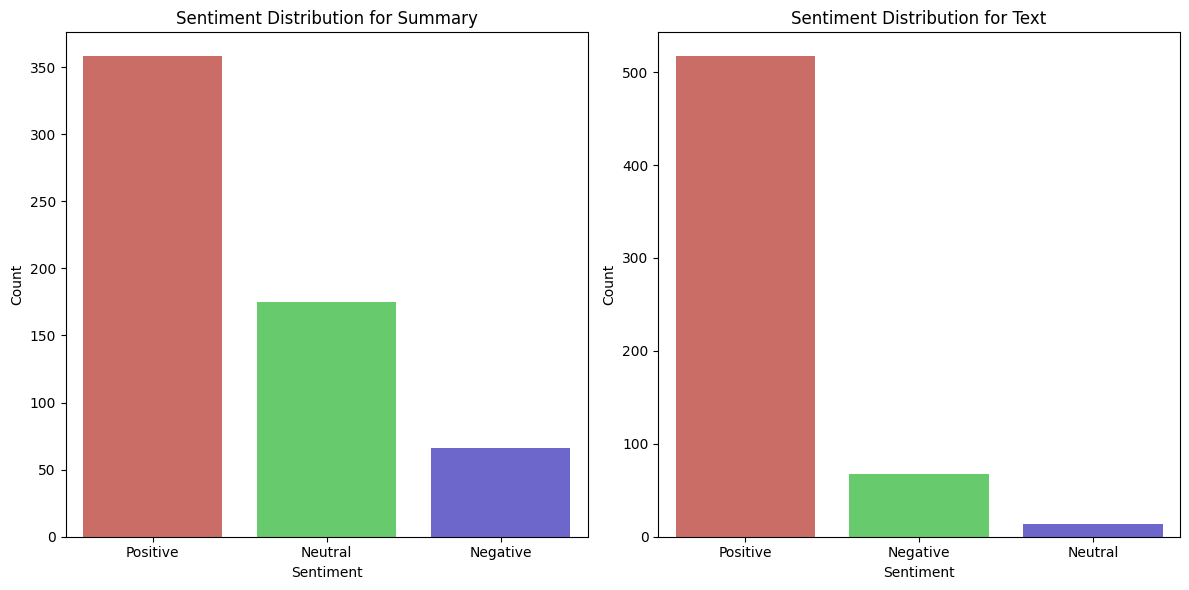

In [4]:
# Function to preprocess text data
def preprocess_text(text):
    text = str(text).lower().strip()
    return text

# Function to perform sentiment analysis
def get_sentiment(text):
    analysis = TextBlob(text)
    polarity = analysis.sentiment.polarity

    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Preprocess text data
data['Summary'] = data['Summary'].apply(preprocess_text)
data['Text'] = data['Text'].apply(preprocess_text)

# Perform sentiment analysis and add sentiment labels
data['Summary_Sentiment'] = data['Summary'].apply(get_sentiment)
data['Text_Sentiment'] = data['Text'].apply(get_sentiment)

# Plot sentiment distribution for Summary and Text separately
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(x='Summary_Sentiment', data=data, palette='hls')
plt.title('Sentiment Distribution for Summary')
plt.xlabel('Sentiment')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.countplot(x='Text_Sentiment', data=data, palette='hls')
plt.title('Sentiment Distribution for Text')
plt.xlabel('Sentiment')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


<ipython-input-23-d25cf417c444>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Score_Sentiment', data=data, palette='hls')


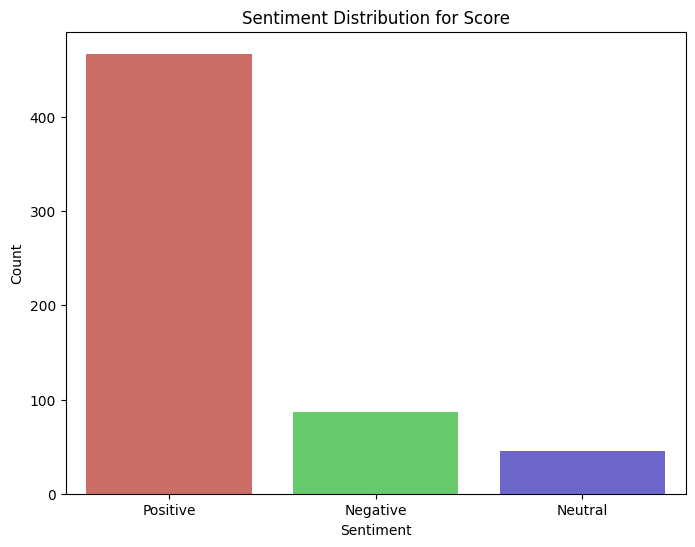

In [23]:
# Function to perform sentiment analysis
def get_sentiment(score):
    if score > 3:
        return 'Positive'
    elif score < 3:
        return 'Negative'
    else:
        return 'Neutral'

# Perform sentiment analysis on Score column
data['Score_Sentiment'] = data['Score'].apply(get_sentiment)

# Plot sentiment distribution for Score
plt.figure(figsize=(8, 6))
sns.countplot(x='Score_Sentiment', data=data, palette='hls')
plt.title('Sentiment Distribution for Score')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

<Figure size 1500x1000 with 0 Axes>

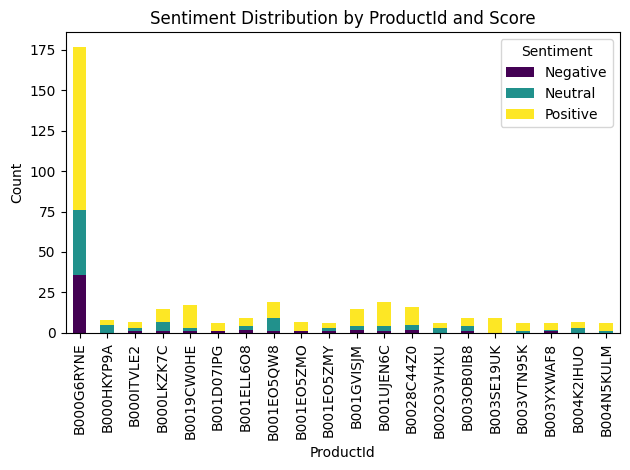

In [44]:

# Function to perform sentiment analysis
def get_sentiment(score):
    if score == 5:
        return 'Positive'
    elif score < 3:
        return 'Negative'
    else:
        return 'Neutral'

# Preprocess text data
data['Summary'] = data['Summary'].apply(preprocess_text)

# Perform sentiment analysis and add sentiment labels
data['Summary_Sentiment'] = data['Score'].apply(get_sentiment)

# Group sentiments by ProductId and Summary_Sentiment
sentiment_by_product_score = data.groupby(['ProductId', 'Summary_Sentiment']).size().unstack(fill_value=0)

# Filter ProductIds with count above 5
sentiment_by_product_score = sentiment_by_product_score[sentiment_by_product_score.sum(axis=1) > 5]

# Plot sentiment distribution for each ProductId and Score
plt.figure(figsize=(15, 10))
sentiment_by_product_score.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Sentiment Distribution by ProductId and Score')
plt.xlabel('ProductId')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

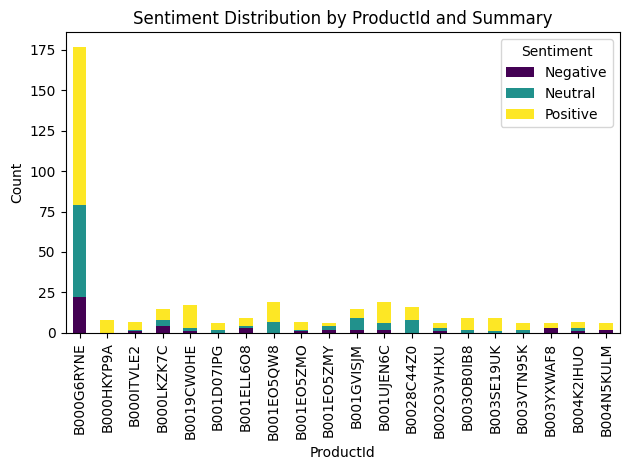

In [40]:
# Function to preprocess text data
def preprocess_text(text):
    text = str(text).lower().strip()
    return text

# Function to perform sentiment analysis
def get_sentiment(text):
    analysis = TextBlob(text)
    polarity = analysis.sentiment.polarity

    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Preprocess text data
data['Summary'] = data['Summary'].apply(preprocess_text)

# Perform sentiment analysis and add sentiment labels
data['Summary_Sentiment'] = data['Summary'].apply(get_sentiment)

# Convert ProductId to string type
data['ProductId'] = data['ProductId'].astype(str)

# Group sentiments by ProductId
sentiment_by_product = data.groupby(['ProductId', 'Summary_Sentiment']).size().unstack(fill_value=0)

# Filter ProductIds with count above 15
sentiment_by_product = sentiment_by_product[sentiment_by_product.sum(axis=1) > 5]

# Plot sentiment distribution for each ProductId
plt.figure(figsize=(10, 6))
sentiment_by_product.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Sentiment Distribution by ProductId and Summary')
plt.xlabel('ProductId')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()

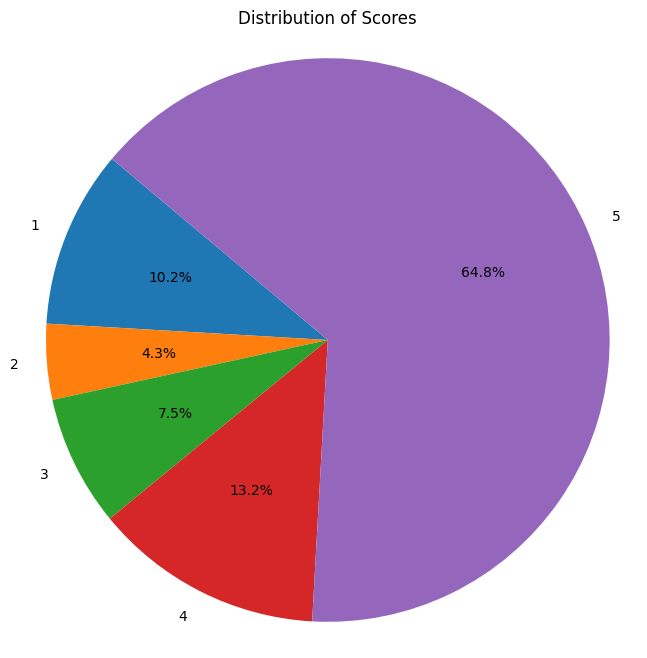

In [41]:
# Count the occurrences of each score value
score_counts = data['Score'].value_counts().sort_index()

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(score_counts, labels=score_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Scores')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

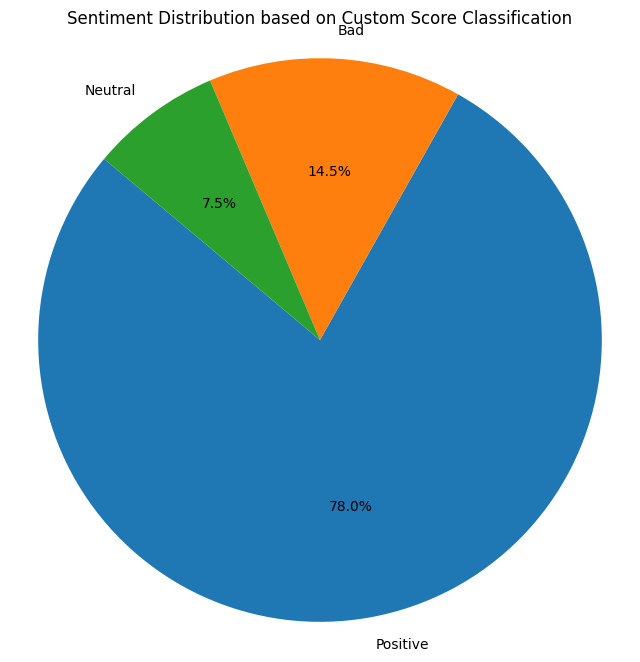

In [43]:
# Function to classify scores as positive, neutral, or bad
def classify_sentiment(score):
    if score in [4, 5]:
        return 'Positive'
    elif score == 3:
        return 'Neutral'
    else:
        return 'Bad'

# Apply sentiment classification to Score column
data['Sentiment'] = data['Score'].apply(classify_sentiment)

# Count the occurrences of each sentiment
sentiment_counts = data['Sentiment'].value_counts()

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution based on Custom Score Classification')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [47]:
import pandas as pd
from textblob import TextBlob

In [48]:
# Function to classify scores as positive, neutral, or bad
def classify_sentiment(score):
    if score in [4, 5]:
        return 'Positive'
    elif score == 3:
        return 'Neutral'
    else:
        return 'Bad'

# Apply sentiment classification to Score column
data['Sentiment'] = data['Score'].apply(classify_sentiment)

# Filter the dataset to include only "bad" reviews
bad_reviews = data[data['Sentiment'] == 'Bad']

# Define function to generate improvement suggestion based on review text
def generate_suggestion(review_text):
    # Perform text analysis using TextBlob
    analysis = TextBlob(review_text)

    # Check for specific patterns or keywords in the review text
    # Example: check for mentions of "shipping", "quality", "customer service", etc.
    if 'shipping' in analysis.lower():
        return "Improvement Suggestion: Consider improving shipping times or delivery processes to enhance customer experience."
    elif 'quality' in analysis.lower():
        return "Improvement Suggestion: Focus on enhancing product quality to meet customer expectations."
    elif 'customer service' in analysis.lower():
        return "Improvement Suggestion: Enhance customer service processes to address customer concerns and improve satisfaction."
    elif 'pricing' in analysis.lower() or 'price' in analysis.lower():
        return "Improvement Suggestion: Review pricing strategies to ensure competitive prices and value for customers."
    elif 'website' in analysis.lower() or 'usability' in analysis.lower():
        return "Improvement Suggestion: Enhance website usability and navigation to provide a seamless shopping experience."
    elif 'selection' in analysis.lower() or 'variety' in analysis.lower():
        return "Improvement Suggestion: Expand product selection to offer a wider variety of options for customers."
    else:
        return "Improvement Suggestion: Consider addressing the issues raised in the review to improve customer satisfaction."

# Generate custom improvement suggestions for each bad review
for index, review in bad_reviews.iterrows():
    suggestion = generate_suggestion(review['Text'])
    print(f"Review ID: {index}")
    print(f"Score: {review['Score']}")
    print(f"Review Text: {review['Text']}")
    print(suggestion)
    print()

Review ID: 1
Score: 1
Review Text: product arrived labeled as jumbo salted peanuts...the peanuts were actually small sized unsalted. not sure if this was an error or if the vendor intended to represent the product as "jumbo".
Improvement Suggestion: Consider addressing the issues raised in the review to improve customer satisfaction.

Review ID: 3
Score: 2
Review Text: if you are looking for the secret ingredient in robitussin i believe i have found it.  i got this in addition to the root beer extract i ordered (which was good) and made some cherry soda.  the flavor is very medicinal.
Improvement Suggestion: Consider addressing the issues raised in the review to improve customer satisfaction.

Review ID: 12
Score: 1
Review Text: my cats have been happily eating felidae platinum for more than two years. i just got a new bag and the shape of the food is different. they tried the new food when i first put it in their bowls and now the bowls sit full and the kitties will not touch the food